In [42]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host='localhost',
                             username='root',
                             password='Sayan@0811',
                             database='ecommerce')

cur = db.cursor()

# Basic Questions

## List all unique cities where customers are located.

In [5]:
query = """ select distinct(customer_city) from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## Count the number of orders placed in 2017.

In [8]:
query = """select count(order_id) from ecommerce.orders
where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

data[0][0]

45101

## Find the total sales per category.

In [14]:
query = """select upper(products.product_category) category, round(sum(payments.payment_value),2) sales
from products join order_item
on products.product_id = order_item.product_id
join payments
on payments.order_id = order_item.order_id
group by category"""

cur.execute(query)

data = cur.fetchall()

data
df = pd.DataFrame(data,columns = ['Category','Sales'])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


## Calculate the percentage of orders that were paid in installments.

In [17]:
query = """ select (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('99.9981'),)]

## Count the number of customers from each state. 

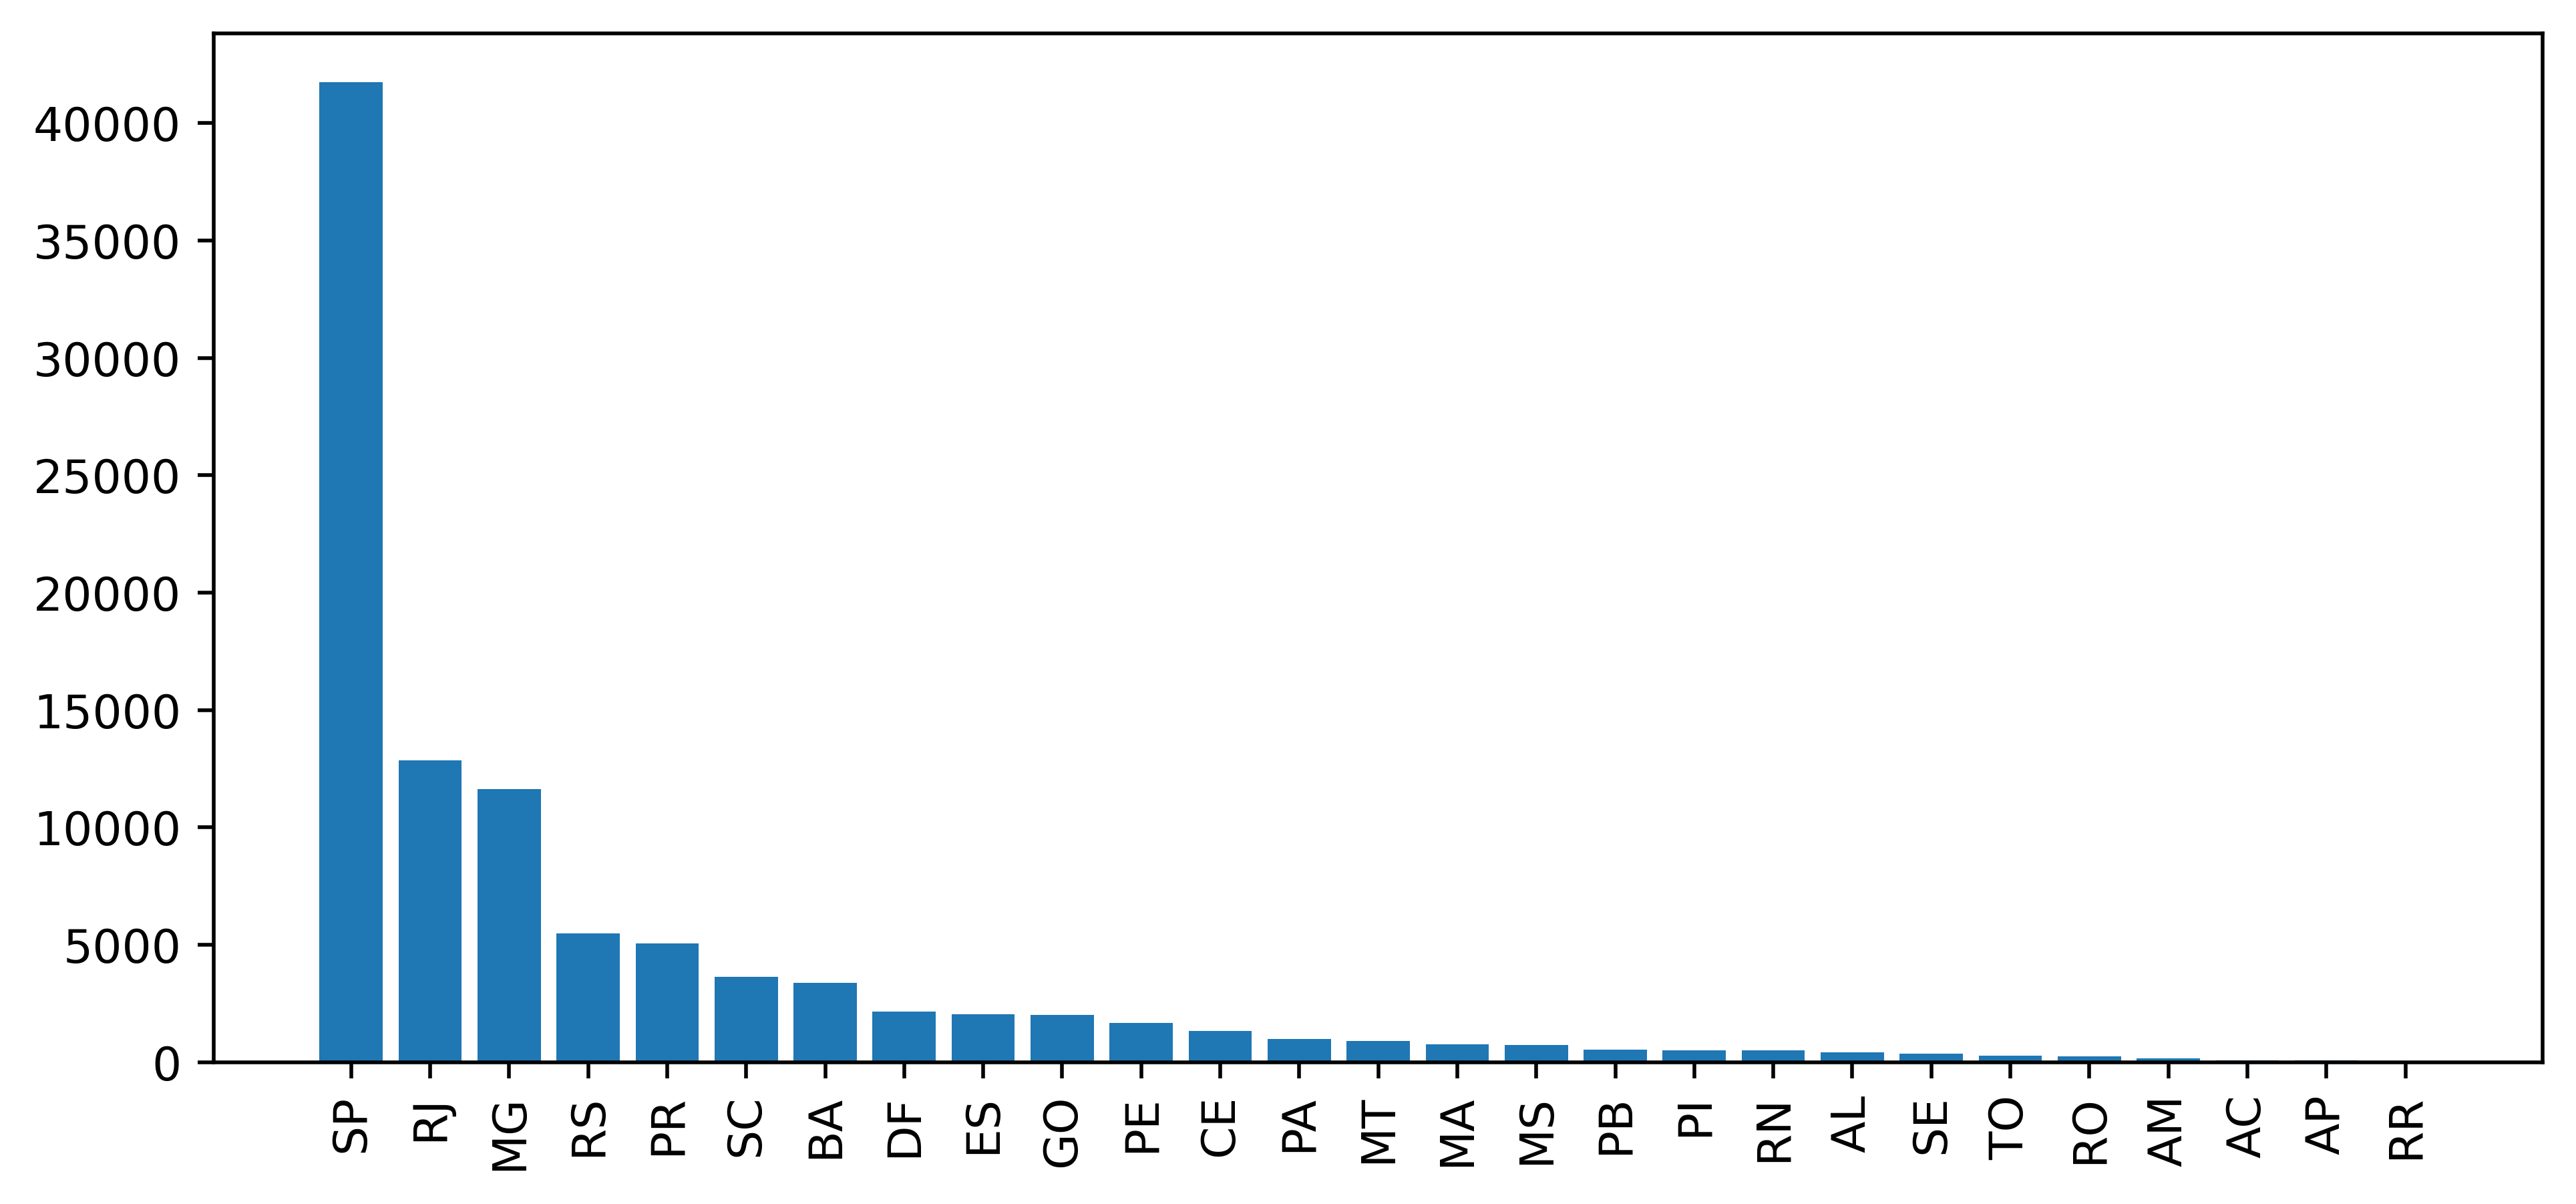

In [24]:
query = """select customer_state,count(customer_id) from ecommerce.customers
group by customer_state"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data,columns = ['State','customer_count'])
df = df.sort_values(by = 'customer_count',ascending=False)

plt.figure(figsize=(9,4),dpi=500)
plt.bar(df['State'],df['customer_count'])
plt.xticks(rotation = 90)
plt.show()

# Intermediate Queries

## Calculate the number of orders per month in 2018.

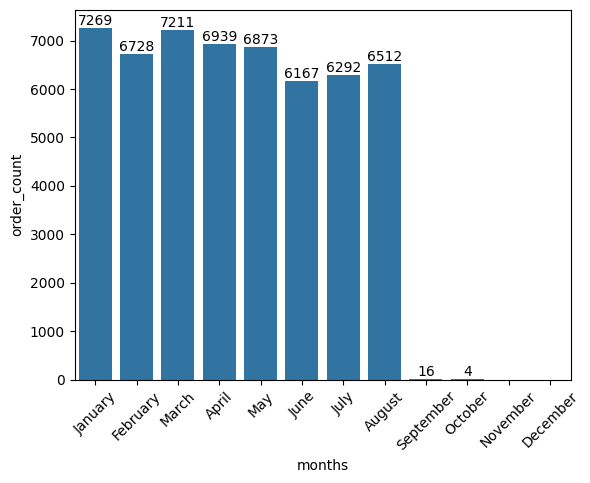

In [30]:
query = """select monthname(order_purchase_timestamp) months, count(order_id)
from ecommerce.orders
where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)

data = cur.fetchall()

data
df = pd.DataFrame(data, columns = ['months','order_count'])
o = ['January','February','March','April','May','June','July','August','September','October','November','December']

ax = sns.barplot(x = df['months'],y = df['order_count'], data=df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

## Find the average number of products per order, grouped by customer city.

In [33]:
query = """with count_per_order as
(select orders.order_id, orders.customer_id, count(order_item.order_id) as oc
from orders join order_item 
on orders.order_id = order_item.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()

data

[('sao paulo', Decimal('1.16')),
 ('sao jose dos campos', Decimal('1.14')),
 ('porto alegre', Decimal('1.17')),
 ('indaial', Decimal('1.12')),
 ('treze tilias', Decimal('1.27')),
 ('rio de janeiro', Decimal('1.15')),
 ('mario campos', Decimal('1.33')),
 ('guariba', Decimal('1.00')),
 ('cuiaba', Decimal('1.20')),
 ('franca', Decimal('1.25')),
 ('tocos', Decimal('1.00')),
 ('januaria', Decimal('1.18')),
 ('campinas', Decimal('1.16')),
 ('embu-guacu', Decimal('1.24')),
 ('cerquilho', Decimal('1.17')),
 ('belo horizonte', Decimal('1.14')),
 ('taubate', Decimal('1.13')),
 ('arcos', Decimal('1.12')),
 ('monte mor', Decimal('1.08')),
 ('vianopolis', Decimal('1.33')),
 ('cacapava', Decimal('1.16')),
 ('sao jose da tapera', Decimal('1.00')),
 ('belford roxo', Decimal('1.09')),
 ('pedro leopoldo', Decimal('1.25')),
 ('arroio do sal', Decimal('1.29')),
 ('sao bernardo do campo', Decimal('1.14')),
 ('brasilia', Decimal('1.13')),
 ('ribeirao pires', Decimal('1.12')),
 ('contagem', Decimal('1.14')),

## Calculate the percentage of total revenue contributed by each product category.

In [35]:
query = """select upper(products.product_category) category,round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_item
on products.product_id = order_item.product_id
join payments
on payments.order_id = order_item.order_id
group by category
order by sales_percentage desc"""

cur.execute(query)

data = cur.fetchall()

data

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('CASA CONSTRUCAO', 0.85),
 ('ROOM FURNITURE', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('CONSTRUCTION TOOLS ILLUMINATION',

## Identify the correlation between product price and the number of times a product has been purchased.

In [43]:
query = """select products.product_category,
count(order_item.product_id),round(avg(order_item.price),2) from products
join order_item
on products.product_id = order_item.product_id
group by products.product_category"""

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data,columns=['Category','order_count','price'])

arr1 = df['order_count']
arr2 = df['price']

np.corrcoef([arr1,arr2])


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

In [44]:
print("Neutral Relationship")

Neutral Relationship


## Calculate the total revenue generated by each seller, and rank them by revenue.

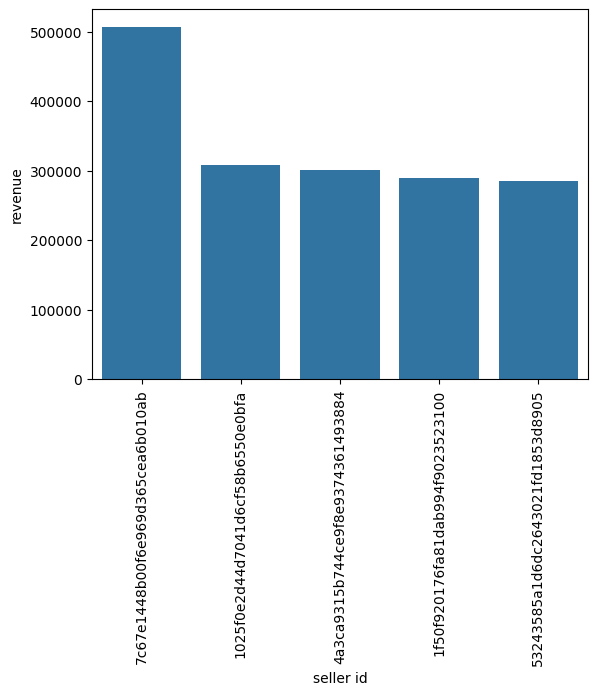

In [54]:
query = """select *,dense_rank() over(order by revenue desc) as rn
from (select order_item.seller_id, round(sum(payments.payment_value),2)
revenue from order_item join payments
on order_item.order_id = payments.order_id
group by order_item.seller_id) as a"""

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ['seller id', 'revenue', 'rank'])
df.head()
sns.barplot(x='seller id',y='revenue', data=df.head())
plt.xticks(rotation=90)
plt.show()

# Advance Queries

## Calculate the moving average of order values for each customer over their order history.

In [58]:
query = """ select customer_id, order_purchase_timestamp,payment,avg(payment)
over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=['customer_id','order_purchase_timestamp','payment','mov_avg'])
df.head()

,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


## Calculate the cumulative sales per month for each year.

In [64]:
query = """ select years, months, payment, sum(payment)
over(order by years,months) cumalative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months
order by years, months) as a;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['year','month','payment','cumalative_sum'])
df.head()

,year,month,payment,cumalative_sum
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


## Calculate the year-over-year growth rate of total sales.

In [67]:
query = """ with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment-lag(payment,1) over(order by years))/
lag(payment,1) over(order by years))*100 from a;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['years','yoy % growth'])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [74]:
query = """with a as (select customers.customer_id, min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id,count(distinct order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id
"""

cur.execute(query)

data = cur.fetchall()
print(data)
print("No customer")

[(None,)]
No customer


## Identify the top 3 customers who spent the most money in each year.

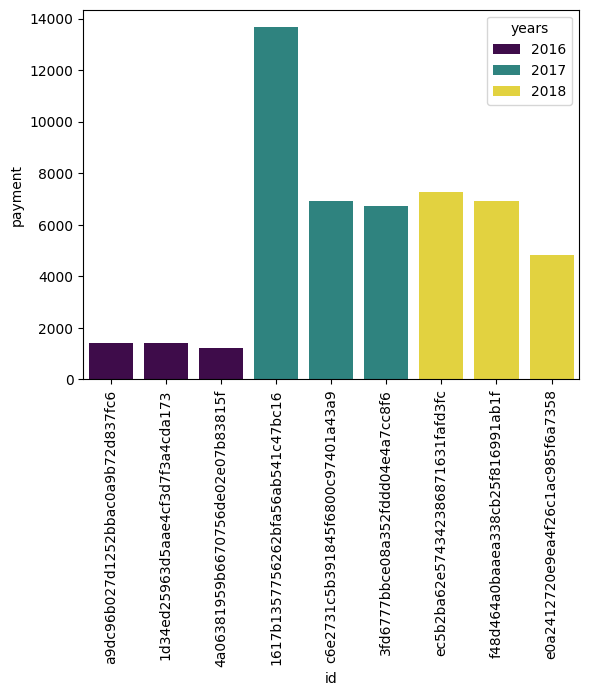

In [84]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),orders.customer_id) as a

where d_rank<=3;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['years','id','payment','rank'])
sns.barplot(x = 'id',y='payment',data=df,hue='years',palette='viridis')
plt.xticks(rotation= 90)
plt.show()